# This jupyter notebook contains examples of
- some basic functions related to native contacts / bias contact analyses
- interactive plots

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import MDAnalysis as mda
import pyrexMD.core as core
import pyrexMD.misc as misc
import pyrexMD.topology as top
import pyrexMD.analysis.analysis as ana
import pyrexMD.analysis.contacts as con

# Native Contact Analyses
First we have to define MDAnalysis universes to handle data. In this case we just want to compare two different conformations which have no trajectory data.

In [2]:
pdb1 = "files/contacts/1vii_ref.pdb"
pdb2 = "files/contacts/1vii_unfolded_frame.pdb"

u1 = mda.Universe(pdb1)
u2 = mda.Universe(pdb2)

We can check the models/conformations with the trajectory viewer.

In [4]:
tv1 = core.iPlayer(u1)
tv1()

tv2 = core.iPlayer(u2)
tv2()

We can easily obtain a list with native contacts and save them to a log file. Here we use a cutoff distance of 6 Anström and calculate native contacts for the selection string "protein". The function returns:

- NC: native contacts (unique RES pairs)
- NC_d: detailed list of NCs containing (RES pairs), (ATOM numbers), (ATOM names)


In [5]:
NC, NC_d = con.get_Native_Contacts(u1, d_cutoff=6.0, sel="protein", save_as="files/contacts/1vii_native_contacts.txt")

Norming atom ids...
Saved file as: /home/arthur/Dropbox/#PhD/#my_scripts/myPKG/pyrexMD/pyrexMD/examples/files/contacts/1vii_native_contacts.txt


Quick look at the content:

In [6]:
NC

[(1, 6),
 (1, 15),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 10),
 (2, 11),
 (2, 15),
 (2, 33),
 (2, 34),
 (2, 35),
 (2, 36),
 (3, 7),
 (3, 8),
 (3, 15),
 (4, 8),
 (4, 9),
 (4, 14),
 (4, 15),
 (5, 9),
 (5, 10),
 (6, 10),
 (6, 11),
 (6, 36),
 (7, 11),
 (7, 12),
 (7, 13),
 (7, 14),
 (7, 15),
 (7, 16),
 (7, 18),
 (8, 12),
 (8, 13),
 (10, 33),
 (10, 34),
 (10, 35),
 (10, 36),
 (11, 15),
 (11, 18),
 (11, 26),
 (11, 29),
 (11, 30),
 (11, 33),
 (11, 34),
 (11, 35),
 (13, 17),
 (13, 18),
 (14, 18),
 (14, 19),
 (15, 19),
 (15, 20),
 (16, 20),
 (17, 21),
 (18, 25),
 (18, 26),
 (18, 27),
 (18, 28),
 (18, 29),
 (18, 30),
 (19, 26),
 (20, 26),
 (21, 25),
 (21, 26),
 (21, 29),
 (22, 26),
 (22, 27),
 (23, 27),
 (23, 28),
 (24, 28),
 (24, 29),
 (25, 29),
 (25, 30),
 (26, 30),
 (26, 31),
 (27, 31),
 (27, 32),
 (28, 32),
 (28, 33),
 (29, 33),
 (29, 34),
 (29, 35),
 (30, 34),
 (30, 35),
 (31, 35)]

In [7]:
NC_d

[[(1, 6), (19, 81), ('O', 'CB')],
 [(1, 15), (5, 230), ('CA', 'CZ')],
 [(2, 6), (20, 81), ('N', 'CB')],
 [(2, 7), (22, 89), ('CA', 'N')],
 [(2, 8), (33, 109), ('CD2', 'N')],
 [(2, 10), (24, 145), ('CB', 'CB')],
 [(2, 11), (24, 171), ('CB', 'CE2')],
 [(2, 15), (20, 225), ('N', 'CD')],
 [(2, 33), (33, 548), ('CD2', 'C')],
 [(2, 34), (20, 556), ('N', 'O')],
 [(2, 35), (27, 557), ('CG', 'N')],
 [(2, 36), (24, 596), ('CB', 'OC2')],
 [(3, 7), (39, 89), ('N', 'N')],
 [(3, 8), (48, 109), ('C', 'N')],
 [(3, 15), (39, 230), ('N', 'CZ')],
 [(4, 8), (52, 109), ('CA', 'N')],
 [(4, 9), (61, 131), ('O', 'N')],
 [(4, 14), (57, 207), ('CG', 'CG2')],
 [(4, 15), (50, 231), ('N', 'NH1')],
 [(5, 9), (64, 131), ('CA', 'N')],
 [(5, 10), (76, 141), ('O', 'N')],
 [(6, 10), (77, 151), ('N', 'CG2')],
 [(6, 11), (88, 157), ('O', 'N')],
 [(6, 36), (86, 594), ('OD2', 'C')],
 [(7, 11), (89, 173), ('N', 'CD2')],
 [(7, 12), (96, 177), ('CG', 'N')],
 [(7, 13), (91, 200), ('CA', 'O')],
 [(7, 14), (93, 203), ('CB', 'CA')

The contact map of the folded reference structure can be obtained via

<IPython.core.display.Javascript object>


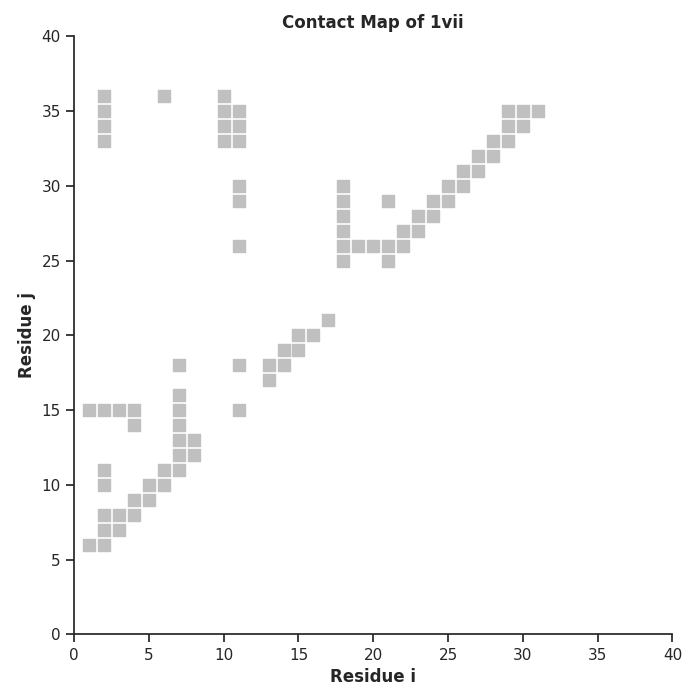

In [8]:
fig, ax = con.plot_Contact_Map(u1, sel="protein")

We can also compare the native contacts of a model (grey) with contacts from an input file (DCA_fin) and test if they are native (green) or non-native (red) within the model.

<IPython.core.display.Javascript object>


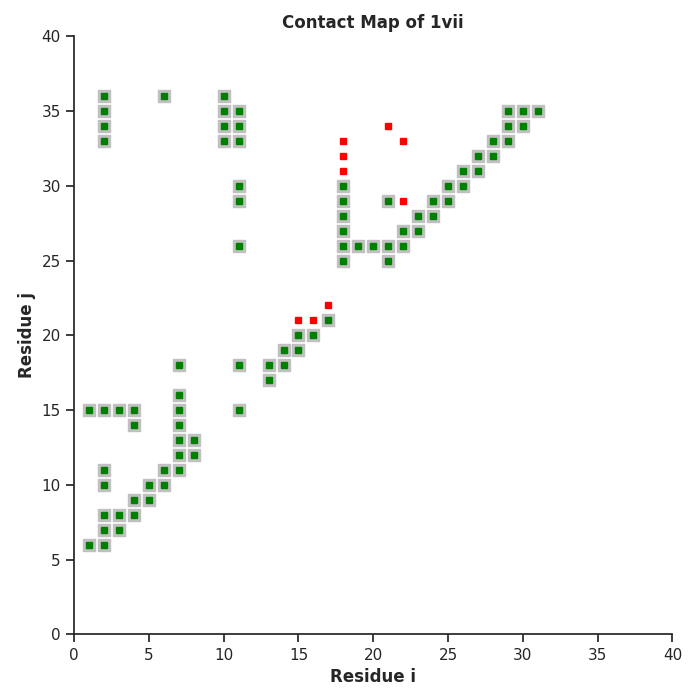

In [9]:
fig, ax = con.plot_Contact_Map(u1, DCA_fin="files/contacts/1vii_mixed_contacts.txt", n_DCA=None)

By extracting the contacts from any model and using them as input for another model, we can use the contact map  plot to compare which contacts remained native (green),  which broke up (red) and which were newly formed (grey).

As an example we compare the contacts between the unfolded and folded state:

Norming atom ids...
Saved file as: /home/arthur/Dropbox/#PhD/#my_scripts/myPKG/pyrexMD/pyrexMD/examples/files/contacts/1vii_unfolded_contacts.txt


<IPython.core.display.Javascript object>


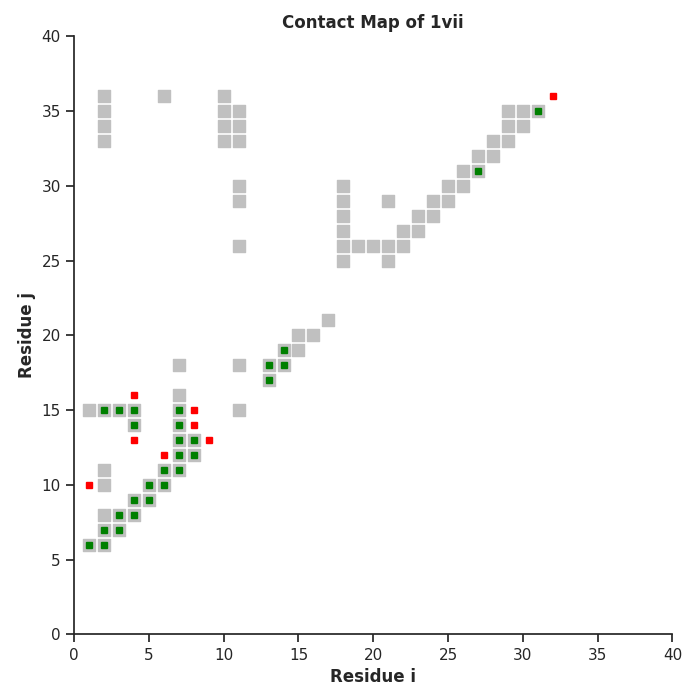

In [10]:
_ = con.get_Native_Contacts(u2, d_cutoff=6.0, sel="protein", save_as="files/contacts/1vii_unfolded_contacts.txt")
fig, ax = con.plot_Contact_Map(u1, DCA_fin="files/contacts/1vii_unfolded_contacts.txt", n_DCA=None)

In a similar way, we can get the native contact distances. The function returns:

- NC: native contacts
- NC_dist: native contact distances
- DM: distance matrices


In [11]:
NC, NC_dist, DM = con.get_NC_distances(u1, u1, sel="protein", d_cutoff=6.0)

We can use the print_table function to quickly take a look on the content. The table only prints a certain number of entries (defaults to 30).

In [12]:
misc.cprint("distance  NC pair", "blue")
_ = misc.print_table([NC_dist, NC], spacing=10, verbose_stop=10)

distance  NC pair
5.649     (1, 6)
4.986     (1, 15)
4.221     (2, 6)
3.525     (2, 7)
5.79      (2, 8)
3.383     (2, 10)
3.541     (2, 11)
2.84      (2, 15)
5.703     (2, 33)
2.93      (2, 34)
misc.print_table(): printed only 10 entries (set by verbose_stop parameter).


In a similar way, we can also create contact maps and display the contact distances.

<IPython.core.display.Javascript object>


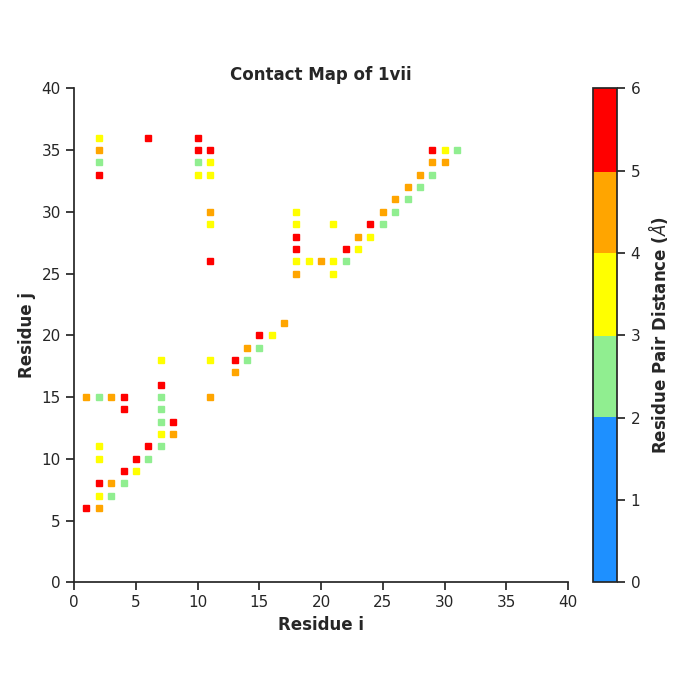

In [13]:
fig, ax = con.plot_Contact_Map_Distances(u1, NC, NC_dist, pdbid="1vii", sel="protein")

Simulations are often biased using contacts from theoretical or experimental sources. We can check the contacts for their True Positive Rate (TPR) based on their number of ranked contacts.

For example:

<IPython.core.display.Javascript object>


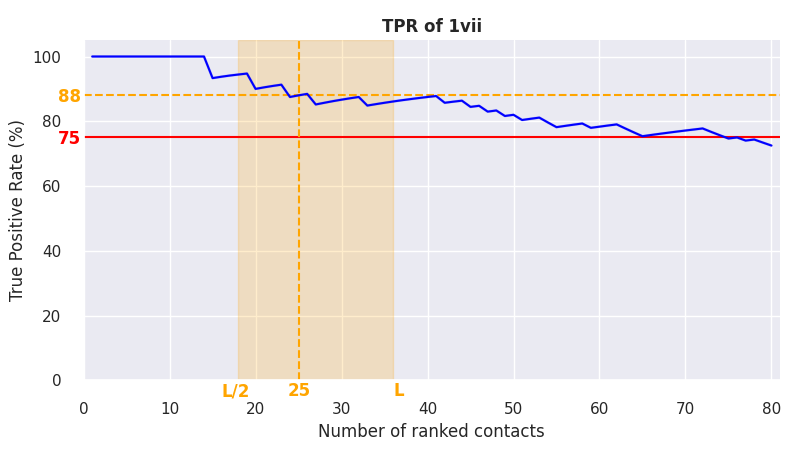

Reference has 36 residues


In [14]:
fig, ax = con.plot_DCA_TPR(u1, DCA_fin="files/contacts/1vii.rr", n_DCA=80, d_cutoff=8.0)

The input file '1vii.rr' contains predicted contacts with cutoff = 8A.

The figure shows:
- blue line: TPR
- red line: 75% cutoff threshold (TPR of used number of contacts should be above 75% for contact-guided REX, see  https://doi.org/10.1371/journal.pone.0242072)
- orange lines: suggested/guessed optimum number of contacts and the corresponding TPR
- orange region: suggested region of interest between L/2 and L contacts


# QNative Analysis

The fraction of realized native contacts (QValues, or specifically "QNative") is often of great interest.

Exemplarily, we use a very short simulation and define the reference structure and the mobile structure (which contains the trajectory data).

In [15]:
ref = "files/traj/2hba_ChainB_ref.pdb"
top = "files/traj/traj_protein.tpr"
traj = "files/traj/traj_protein.xtc"
u1 = mda.Universe(top,traj)   # mobile
u2 = mda.Universe(ref)        # reference

tv1 = core.iPlayer(u1)
tv1()
tv2 = core.iPlayer(u2)
tv2()

/home/arthur/.local/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:216: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


We calculate QNative. The function returns:

- FRAMES: array with frames
- QNATIVE: array with fraction of native contacts

Norming mobile atom ids...
Norming mobile atom ids...
Both universes are normed and aligned (atom ids + resids).


  0%|          | 0/51 [00:00<?, ?it/s]

average QNative value: 0.976


<IPython.core.display.Javascript object>


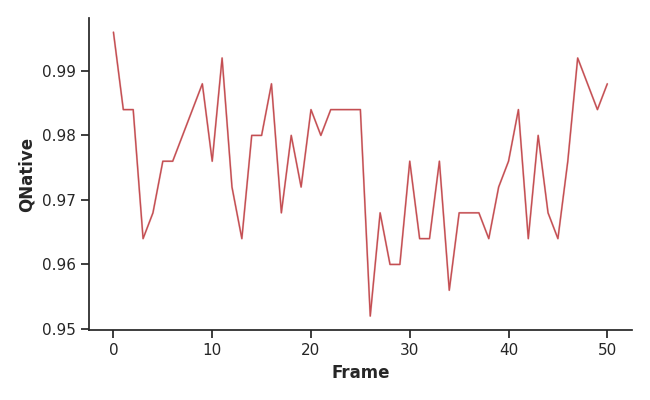

In [16]:
FRAMES, QNATIVE = con.get_QNative(u1,u2, method="radius_cut", sel="protein and name CA", marker="None", lw=1)

Many analysis functions also generate plots automatically but can be supressed via plot=False.



To obtain the list of contact pairs used during the QNative analysis, we can use the function get_Native_Contacts as before.

The function returns:
- NC: native contacts (unique RES pairs)
- NC_d: detailed list of NCs containing (RES pairs), (ATOM numbers), (ATOM names)

In [17]:
NC, NC_d = con.get_Native_Contacts(u1, sel="protein and name CA")
NC

[(1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (2, 19),
 (2, 20),
 (2, 38),
 (2, 39),
 (3, 18),
 (3, 19),
 (3, 37),
 (3, 38),
 (3, 39),
 (4, 17),
 (4, 18),
 (4, 36),
 (4, 37),
 (4, 39),
 (5, 15),
 (5, 16),
 (5, 17),
 (5, 35),
 (5, 36),
 (6, 15),
 (6, 35),
 (6, 36),
 (7, 14),
 (7, 15),
 (7, 35),
 (8, 13),
 (8, 14),
 (8, 15),
 (9, 13),
 (23, 27),
 (24, 28),
 (25, 29),
 (26, 30),
 (26, 31),
 (27, 31),
 (28, 32),
 (29, 33),
 (30, 35),
 (30, 36),
 (31, 36),
 (31, 37),
 (39, 44),
 (40, 44),
 (41, 45)]

# QBias Analysis

Analogously to the QNative analysis we can look at the fraction of formed bias contacts ("QBias"). The first steps are identical to before:

In [18]:
ref = "files/traj/2hba_ChainB_ref.pdb"
top = "files/traj/traj_protein.tpr"
traj = "files/traj/traj_protein.xtc"
u1 = mda.Universe(top,traj)   # mobile
u2 = mda.Universe(ref)        # reference

sel = "protein and name CA"
NC, NC_d = con.get_Native_Contacts(u2, sel=sel)

Next we calculate QBias and directly plot the time evolution. The function returns:

- FRAMES: array with frame numbers
- QBIAS: array with fraction of formed bias contacts
- CM: array with contact matrices

Norming atom ids...
Norming atom ids...
calculating distance matrices...


  0%|          | 0/51 [00:00<?, ?it/s]

calculating QBias...


  0%|          | 0/51 [00:00<?, ?it/s]

average QBias value: 0.8936666666666667


<IPython.core.display.Javascript object>


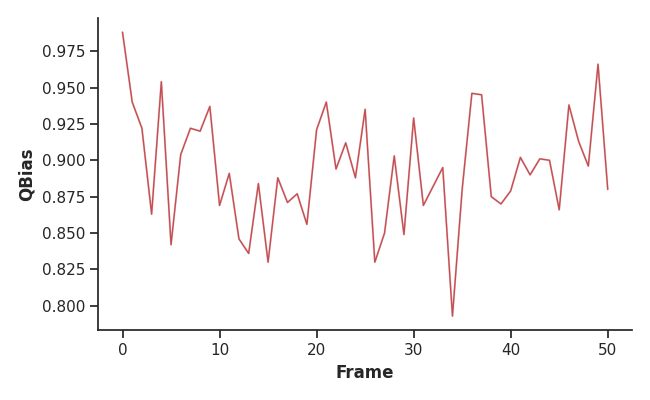

In [19]:
FRAMES, QBIAS, CM = con.get_QBias(u1, NC, d_cutoff=6.0, warn=False, marker=None, lw=1)

We can test the functionality by using native contacts as bias contacts compare the difference between QNative and QBias.

In [20]:
misc.cprint("Comparison: QNative - QBias ; include_selfcontacts=False", "blue")
print(QNATIVE - QBIAS)

Comparison: QNative - QBias ; include_selfcontacts=False
[0.008 0.044 0.062 0.101 0.014 0.134 0.072 0.058 0.064 0.051 0.107 0.101
 0.126 0.128 0.096 0.15  0.1   0.097 0.103 0.116 0.063 0.04  0.09  0.072
 0.096 0.049 0.122 0.118 0.057 0.111 0.047 0.095 0.082 0.081 0.163 0.088
 0.022 0.023 0.089 0.102 0.097 0.082 0.074 0.079 0.068 0.098 0.038 0.079
 0.092 0.018 0.108]


Note: the qvalue algorithm for native contacts ("QNative") includes selfcontacts. Comparison of both methods yields better results when include_selfcontacts (bool, see kwargs) is set to True. However this improves the calculated QBias value artificially (e.g. even when all used bias contacts are never formed, QBias will not be zero due to the selfcontact counts). Hence include_selfcontacts defaults to False.

In [21]:
#FRAMES, QBIAS, CM = con.get_QBias(u1, NC, d_cutoff=6.0, include_selfcontacts=True, warn=False, marker=None, lw=1)
FRAMES, QBIAS, CM = con.get_QBias(u1, NC, d_cutoff=6.0, include_selfcontacts=True, warn=False, plot=False)

misc.cprint("Comparison: QNative - QBias ; include_selfcontacts=True", "blue")
print(QNATIVE - QBIAS)

calculating distance matrices...


  0%|          | 0/51 [00:00<?, ?it/s]

calculating QBias...


  0%|          | 0/51 [00:00<?, ?it/s]

Comparison: QNative - QBias ; include_selfcontacts=True
[ 0.001  0.012  0.021  0.028 -0.01   0.05   0.021  0.016  0.022  0.018
  0.038  0.043  0.044  0.041  0.035  0.06   0.041  0.029  0.038  0.04
  0.021  0.008  0.034  0.025  0.036  0.015  0.032  0.039  0.005  0.031
  0.009  0.025  0.02   0.025  0.053  0.024 -0.007 -0.006  0.023  0.033
  0.033  0.03   0.016  0.026  0.015  0.027  0.005  0.033  0.037  0.
  0.044]


We can extract formed bias contacts for individual frames (here frame 0) via:

In [22]:
CP = con.get_formed_contactpairs(u1, CM[0], include_selfcontacts=False)
CP

[(1, 2),
 (1, 3),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (2, 3),
 (2, 19),
 (2, 20),
 (2, 38),
 (2, 39),
 (3, 4),
 (3, 18),
 (3, 19),
 (3, 37),
 (3, 38),
 (3, 39),
 (4, 5),
 (4, 16),
 (4, 17),
 (4, 18),
 (4, 36),
 (4, 37),
 (4, 39),
 (5, 6),
 (5, 7),
 (5, 15),
 (5, 16),
 (5, 17),
 (5, 35),
 (5, 36),
 (6, 7),
 (6, 15),
 (6, 35),
 (6, 36),
 (7, 8),
 (7, 14),
 (7, 15),
 (7, 35),
 (8, 9),
 (8, 13),
 (8, 14),
 (8, 15),
 (9, 10),
 (9, 12),
 (9, 13),
 (10, 11),
 (10, 12),
 (11, 12),
 (12, 13),
 (13, 14),
 (14, 15),
 (14, 17),
 (15, 16),
 (15, 17),
 (16, 17),
 (17, 18),
 (18, 19),
 (19, 20),
 (19, 21),
 (20, 21),
 (21, 22),
 (22, 23),
 (22, 24),
 (22, 25),
 (23, 24),
 (23, 25),
 (23, 26),
 (23, 27),
 (24, 25),
 (24, 26),
 (24, 27),
 (24, 28),
 (25, 26),
 (25, 27),
 (25, 28),
 (25, 29),
 (26, 27),
 (26, 28),
 (26, 29),
 (26, 30),
 (26, 31),
 (27, 28),
 (27, 29),
 (27, 31),
 (28, 29),
 (28, 32),
 (29, 30),
 (29, 31),
 (29, 32),
 (29, 33),
 (30, 31),
 (30, 32),
 (30, 33),
 (30, 35),
 (30, 36),


# Interactive Plots

Short showcase of the interactive plot function. It links the trajectory viewer to a 2D plot, where you can use inspect conformations at specific xy-values.


- ctrl-click or shift-click into plot to jump to specific frames
- click on TIME/FRAME widget to toggle between modes
- modify the representation via UI

<IPython.core.display.Javascript object>


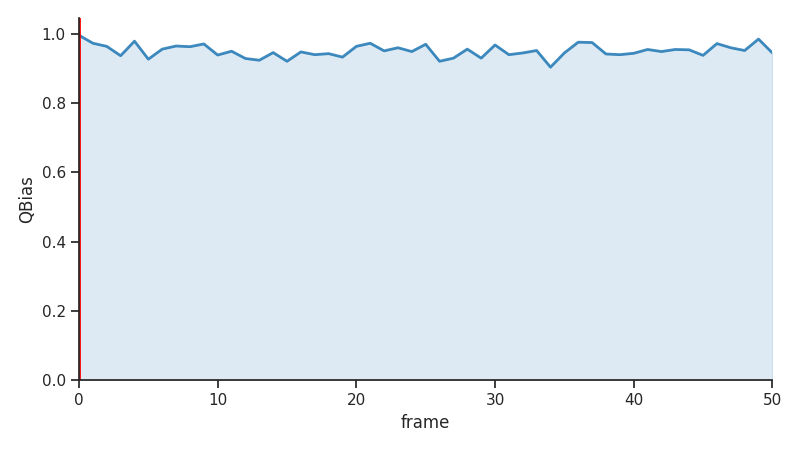

In [23]:
IP = core.iPlot(u1, xdata=FRAMES, ydata=QBIAS, xlabel="frame", ylabel="QBias")
IP()